# Exploratory data analysis

Import all the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
sns.set()
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

Now, we will assign the data to respective dataframes using the pandas library.

In [2]:
client_data=pd.read_csv('client_data_csv.csv')
price_data=pd.read_csv('price_data_csv.csv')

Now, we will investigate the data imported into the data frames.

In [3]:
client_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


In [4]:
price_data.head()

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [5]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


Note that some features mentioned in the data seems highly skewed because of the unusually high interquartile range shown by the percentile values.

In [6]:
sum(client_data['churn'])

1419

In [7]:
client_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

The date variables are not the correct date time format.

In [8]:
client_data['id'].unique().shape

(14606,)

The total number of unique clients is 14606 and 1419 have churned giving a churning rate of about 10%.

In [9]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In [10]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


The price data seems okay, although some data features seem skewed.

# Data visualization (EDA)

In [11]:
churn_channel=client_data[['id','channel_sales','churn']]

In [12]:
churn_channel.head()

,id,channel_sales,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,0


In [13]:
churn_channel['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

In [14]:
List=['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa']

In [15]:
len(List)

8

In [16]:
channel_churn_dataframe=pd.DataFrame(List,columns={'Channel_Name'})
channel_churn_dataframe

,Channel_Name
0,foosdfpfkusacimwkcsosbicdxkicaua
1,MISSING
2,lmkebamcaaclubfxadlmueccxoimlema
3,usilxuppasemubllopkaafesmlibmsdf
4,ewpakwlliwisiwduibdlfmalxowmwpci
5,epumfxlbckeskwekxbiuasklxalciiuu
6,sddiedcslfslkckwlfkdpoeeailfpeds
7,fixdbufsefwooaasfcxdxadsiekoceaa


In [17]:
churn_channel.loc[churn_channel['channel_sales']=='foosdfpfkusacimwkcsosbicdxkicaua','churn'].sum()

820

In [18]:
churn_channel.loc[churn_channel['channel_sales']=='MISSING','churn'].sum()

283

In [19]:
churn_channel.loc[churn_channel['channel_sales']=='lmkebamcaaclubfxadlmueccxoimlema','churn'].sum()

103

In [20]:
churn_channel.loc[churn_channel['channel_sales']=='usilxuppasemubllopkaafesmlibmsdf','churn'].sum()

138

In [21]:
churn_channel.loc[churn_channel['channel_sales']=='ewpakwlliwisiwduibdlfmalxowmwpci','churn'].sum()

75

In [22]:
churn_channel.loc[churn_channel['channel_sales']=='epumfxlbckeskwekxbiuasklxalciiuu','churn'].sum()

0

In [23]:
churn_channel.loc[churn_channel['channel_sales']=='sddiedcslfslkckwlfkdpoeeailfpeds','churn'].sum()

0

In [24]:
churn_channel.loc[churn_channel['channel_sales']=='fixdbufsefwooaasfcxdxadsiekoceaa','churn'].sum()

0

In [25]:
sum_churns=[820,283,103,138,75,0,0,0]

In [26]:
channel_churn_dataframe['Churn_Number']=sum_churns

In [27]:
channel_churn_dataframe

,Channel_Name,Churn_Number
0,foosdfpfkusacimwkcsosbicdxkicaua,820
1,MISSING,283
2,lmkebamcaaclubfxadlmueccxoimlema,103
3,usilxuppasemubllopkaafesmlibmsdf,138
4,ewpakwlliwisiwduibdlfmalxowmwpci,75
5,epumfxlbckeskwekxbiuasklxalciiuu,0
6,sddiedcslfslkckwlfkdpoeeailfpeds,0
7,fixdbufsefwooaasfcxdxadsiekoceaa,0


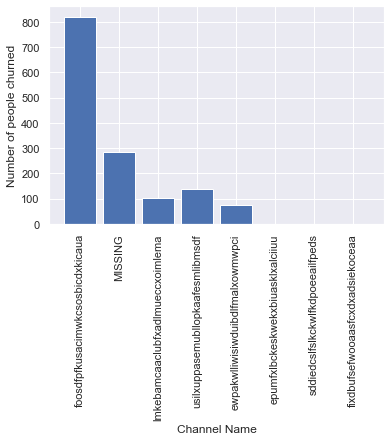

In [28]:
plt.bar(channel_churn_dataframe['Channel_Name'],channel_churn_dataframe['Churn_Number'])
plt.xticks(rotation='vertical')
plt.xlabel('Channel Name')
plt.ylabel('Number of people churned')
plt.show()

It seems that churning is observed only in 5 channels with major churn in first channel.

<AxesSubplot:xlabel='cons_12m', ylabel='Density'>

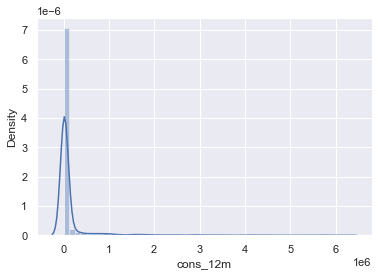

In [29]:
sns.distplot(client_data['cons_12m'])

<AxesSubplot:xlabel='cons_gas_12m', ylabel='Density'>

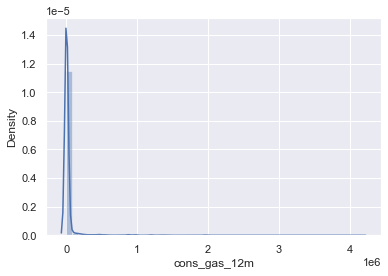

In [30]:
sns.distplot(client_data['cons_gas_12m'])

<AxesSubplot:xlabel='cons_last_month', ylabel='Density'>

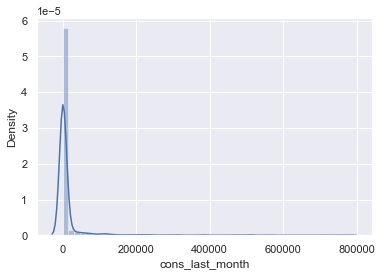

In [31]:
sns.distplot(client_data['cons_last_month'])

<AxesSubplot:xlabel='imp_cons', ylabel='Density'>

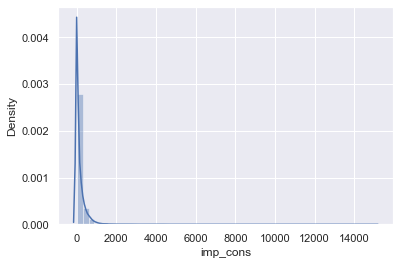

In [32]:
sns.distplot(client_data['imp_cons'])

The plots for consumptions show that the data is heavily skewed and the is a presence of outliers. This was observed using the interquartile range earlier. Tranformations need to be made next to correct this.
The other variables are also similarly skewed.

In [33]:
# Transform date columns to datetime type
client_data["date_activ"] = pd.to_datetime(client_data["date_activ"], format='%Y-%m-%d')
client_data["date_end"] = pd.to_datetime(client_data["date_end"], format='%Y-%m-%d')
client_data["date_modif_prod"] = pd.to_datetime(client_data["date_modif_prod"], format='%Y-%m-%d')
client_data["date_renewal"] = pd.to_datetime(client_data["date_renewal"], format='%Y-%m-%d')
price_data['price_date'] = pd.to_datetime(price_data['price_date'], format='%Y-%m-%d')

# Create mean average data
mean_year = price_data.groupby(['id']).mean().reset_index()
mean_6m = price_data[price_data['price_date'] > '2015-06-01'].groupby(['id']).mean().reset_index()
mean_3m = price_data[price_data['price_date'] > '2015-10-01'].groupby(['id']).mean().reset_index()

# Comnbine into single dataframe
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",
        "price_peak_var": "mean_year_price_p2_var",
        "price_mid_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_peak_fix": "mean_year_price_p2_fix",
        "price_mid_peak_fix": "mean_year_price_p3_fix"
    }
)

mean_year["mean_year_price_p1"] = mean_year["mean_year_price_p1_var"] + mean_year["mean_year_price_p1_fix"]
mean_year["mean_year_price_p2"] = mean_year["mean_year_price_p2_var"] + mean_year["mean_year_price_p2_fix"]
mean_year["mean_year_price_p3"] = mean_year["mean_year_price_p3_var"] + mean_year["mean_year_price_p3_fix"]

mean_6m = mean_6m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_6m_price_p1_var",
        "price_peak_var": "mean_6m_price_p2_var",
        "price_mid_peak_var": "mean_6m_price_p3_var",
        "price_off_peak_fix": "mean_6m_price_p1_fix",
        "price_peak_fix": "mean_6m_price_p2_fix",
        "price_mid_peak_fix": "mean_6m_price_p3_fix"
    }
)
mean_6m["mean_6m_price_p1"] = mean_6m["mean_6m_price_p1_var"] + mean_6m["mean_6m_price_p1_fix"]
mean_6m["mean_6m_price_p2"] = mean_6m["mean_6m_price_p2_var"] + mean_6m["mean_6m_price_p2_fix"]
mean_6m["mean_6m_price_p3"] = mean_6m["mean_6m_price_p3_var"] + mean_6m["mean_6m_price_p3_fix"]

mean_3m = mean_3m.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_3m_price_p1_var",
        "price_peak_var": "mean_3m_price_p2_var",
        "price_mid_peak_var": "mean_3m_price_p3_var",
        "price_off_peak_fix": "mean_3m_price_p1_fix",
        "price_peak_fix": "mean_3m_price_p2_fix",
        "price_mid_peak_fix": "mean_3m_price_p3_fix"
    }
)
mean_3m["mean_3m_price_p1"] = mean_3m["mean_3m_price_p1_var"] + mean_3m["mean_3m_price_p1_fix"]
mean_3m["mean_3m_price_p2"] = mean_3m["mean_3m_price_p2_var"] + mean_3m["mean_3m_price_p2_fix"]
mean_3m["mean_3m_price_p3"] = mean_3m["mean_3m_price_p3_var"] + mean_3m["mean_3m_price_p3_fix"]

# Merge into 1 dataframe
price_features = pd.merge(mean_year, mean_6m, on='id')
price_features = pd.merge(price_features, mean_3m, on='id')

In [34]:
price_features.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_6m_price_p3,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,16.365283,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.000000,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.000000,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000
3,0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,40.766185,24.486748,16.328003,...,16.360973,0.113068,0.095385,0.069409,40.728885,24.43733,16.291555,40.841953,24.532715,16.360964
4,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.000000,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000


Now that we have explored the data, it's time to investigate whether price sensitivity has some influence on churn. First we need to define exactly what is price sensitivity.

> Since we have the consumption data for each of the companies for the year of 2015, we will create new features to measure "price sensitivity" using the average of the year, the last 6 months and the last 3 months

In [35]:
price_analysis = pd.merge(price_features, client_data[['id', 'churn']], on='id')
price_analysis.head()

,id,mean_year_price_p1_var,mean_year_price_p2_var,mean_year_price_p3_var,mean_year_price_p1_fix,mean_year_price_p2_fix,mean_year_price_p3_fix,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,40.826071,24.524832,16.353854,...,0.119906,0.101673,0.073719,40.728885,24.43733,16.291555,40.848791,24.539003,16.365274,0
1,0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,44.531877,0.000000,0.000000,...,0.143943,0.000000,0.000000,44.444710,0.00000,0.000000,44.588653,0.000000,0.000000,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,45.501268,0.000000,0.000000,...,0.201280,0.000000,0.000000,45.944710,0.00000,0.000000,46.145990,0.000000,0.000000,0
3,00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,44.414856,0.000000,0.000000,...,0.145440,0.000000,0.000000,44.266930,0.00000,0.000000,44.412370,0.000000,0.000000,0
4,0013f326a839a2f6ad87a1859952d227,0.126076,0.105542,0.074921,40.728885,24.437330,16.291555,40.854961,24.542872,16.366476,...,0.121647,0.103413,0.075460,40.728885,24.43733,16.291555,40.850532,24.540743,16.367015,0


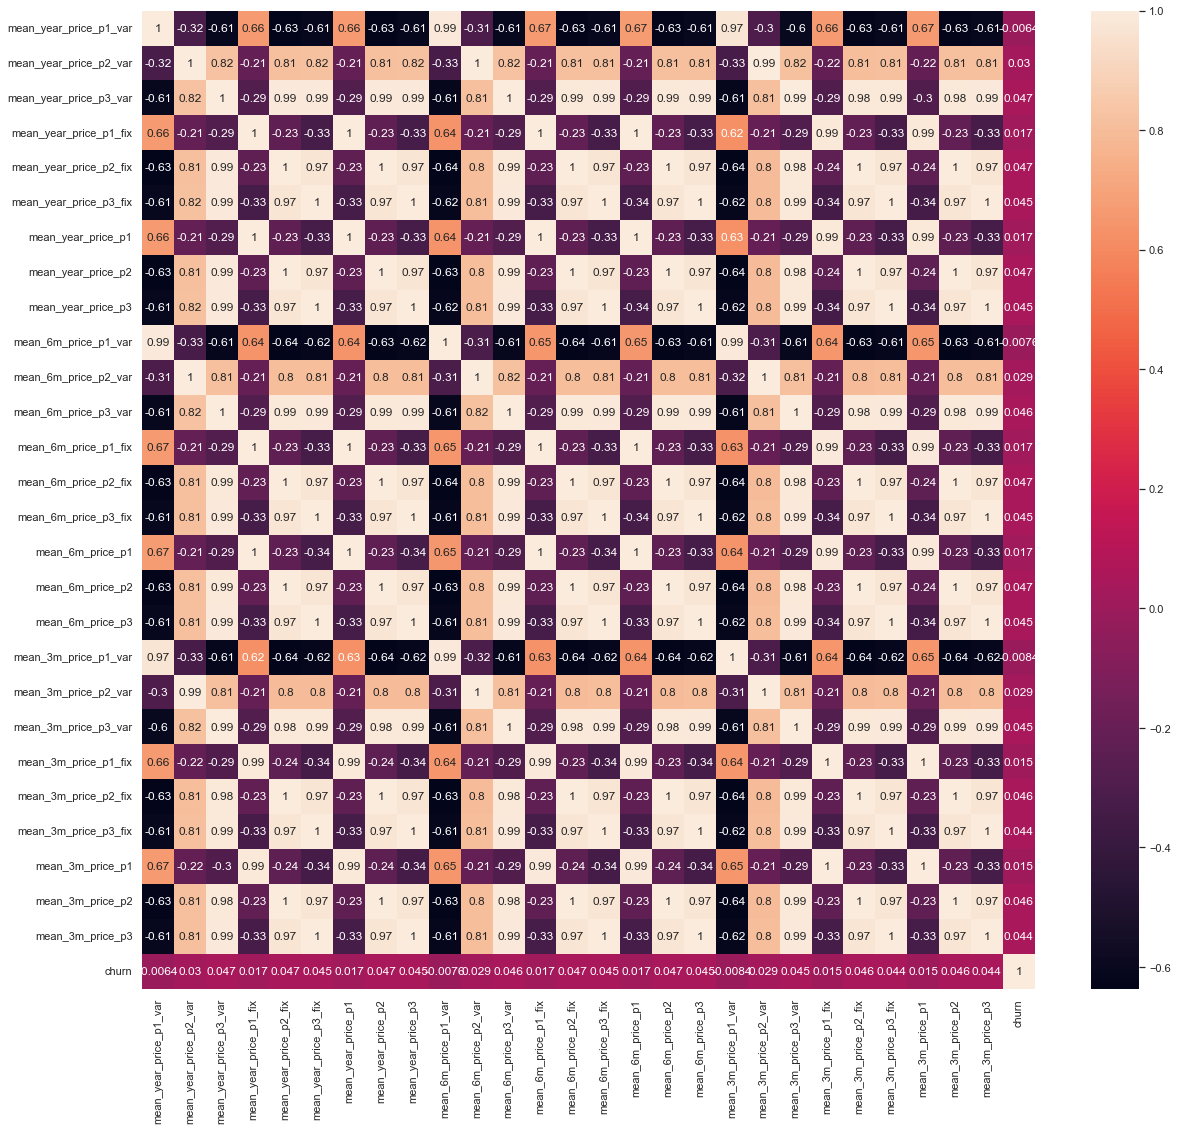

In [36]:
corr = price_analysis.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

Note that correlation between price variables and churn seems to be insignificant at the moment, which is counter intuitive.

In [37]:
merged_data = pd.merge(client_data.drop(columns=['churn']), price_analysis, on='id')

In [38]:
merged_data.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,mean_3m_price_p1_var,mean_3m_price_p2_var,mean_3m_price_p3_var,mean_3m_price_p1_fix,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,0.131756,0.092638,0.036909,42.497907,12.218665,8.145777,42.629663,12.311304,8.182687,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,0.147600,0.000000,0.000000,44.444710,0.000000,0.000000,44.592310,0.000000,0.000000,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,0.167798,0.088409,0.000000,44.444710,0.000000,0.000000,44.612508,0.088409,0.000000,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,0.148586,0.000000,0.000000,44.444710,0.000000,0.000000,44.593296,0.000000,0.000000,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,...,0.119906,0.101673,0.073719,40.728885,24.437330,16.291555,40.848791,24.539003,16.365274,0


# Feature Engineering and Modelling

In [39]:
merged_data.columns.values

array(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3

In [40]:
skewed_variables=['cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak']

In [41]:
merged_data[skewed_variables].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,1.460500e+04,1.460500e+04,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,1.592303e+05,2.809108e+04,16091.371448,1868.638618,1399.858747,0.966450,63.090448,0.137282,0.050488,43.130085
std,5.734836e+05,1.629786e+05,64366.262314,2387.651549,3247.876793,5.108355,66.166636,0.024623,0.049037,4.486140
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.674000e+03,0.000000e+00,0.000000,494.980000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701
50%,1.411600e+04,0.000000e+00,793.000000,1112.610000,314.000000,0.000000,18.800000,0.143166,0.084138,44.311378
75%,4.076400e+04,0.000000e+00,3383.000000,2402.270000,1746.000000,0.000000,131.030000,0.146348,0.098837,44.311378
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378


As many of the features are skewed having a high standard deviation, they need to be corrected by applying appropriate log base 10 transformation which is a widely accepted rule of thumb to treat skewness.
As some features take value 0, for which log is undefined, 1 will be added to the transformation.

In [42]:
df=merged_data
#to make coding shorter, a variable df is introduced.

In [43]:
df["cons_12m"] = np.log10(df["cons_12m"] + 1)
df["cons_gas_12m"] = np.log10(df["cons_gas_12m"] + 1)
df["cons_last_month"] = np.log10(df["cons_last_month"] + 1)
df["forecast_cons_12m"] = np.log10(df["forecast_cons_12m"] + 1)
df["forecast_cons_year"] = np.log10(df["forecast_cons_year"] + 1)
df["forecast_meter_rent_12m"] = np.log10(df["forecast_meter_rent_12m"] + 1)
df["imp_cons"] = np.log10(df["imp_cons"] + 1)

<AxesSubplot:xlabel='cons_12m', ylabel='Density'>

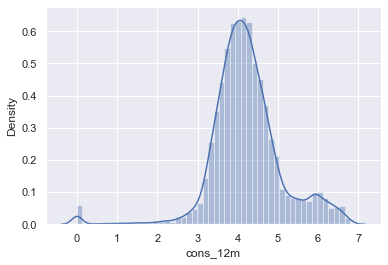

In [44]:
#Check distribution of some variables after correction
sns.distplot(df['cons_12m'])

<AxesSubplot:xlabel='imp_cons', ylabel='Density'>

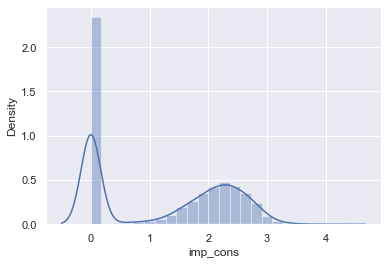

In [45]:
sns.distplot(df['imp_cons'])

Note that all the distributions are approximately normal now.

In [46]:
df[skewed_variables].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak
count,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000
mean,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,0.050488,43.130085
std,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,0.049037,4.486140
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,0.000000,40.606701
50%,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,0.084138,44.311378
75%,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,0.098837,44.311378
max,6.792889,6.618528,5.887169,4.918575,5.243970,30.000000,2.778376,0.273963,0.195975,59.266378


In [47]:
df["date_activ"] = pd.to_datetime(df["date_activ"], format='%Y-%m-%d')
df["date_end"] = pd.to_datetime(df["date_end"], format='%Y-%m-%d')
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"], format='%Y-%m-%d')
df["date_renewal"] = pd.to_datetime(df["date_renewal"], format='%Y-%m-%d')

In [48]:
def convert_months(reference_date, df, column):
    """
    Input a column with timedeltas and return months
    """
    time_delta = reference_date - df[column]
    months = (time_delta / np.timedelta64(1, 'M')).astype(int)
    return months

In [49]:
# Create reference date
reference_date =pd.datetime(2016, 1, 1)

# Create columns
df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

In [50]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them
remove = [
    'date_activ',
    'date_end',
    'date_modif_prod',
    'date_renewal'
]

df = df.drop(columns=remove)
df.head()

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,months_activ,months_to_end,months_modif_prod,months_renewal
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,...,12.218665,8.145777,42.629663,12.311304,8.182687,1,30,-5,2,6
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,...,0.000000,0.000000,44.592310,0.000000,0.000000,0,76,-7,76,4
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,...,0.000000,0.000000,44.612508,0.088409,0.000000,0,68,-3,68,8
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,...,0.000000,0.000000,44.593296,0.000000,0.000000,0,69,-2,69,9
4,149d57cf92fc41cf94415803a877cb4b,MISSING,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,...,24.437330,16.291555,40.848791,24.539003,16.365274,0,71,-2,71,9


In [51]:
df.describe(include='all')

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,...,mean_3m_price_p2_fix,mean_3m_price_p3_fix,mean_3m_price_p1,mean_3m_price_p2,mean_3m_price_p3,churn,months_activ,months_to_end,months_modif_prod,months_renewal
count,14605,14605,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,...,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.000000,14605.00000,14605.000000,14605.000000,14605.000000
unique,14605,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,6753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,4.223945,0.778978,2.264801,2.962162,1.784733,0.966450,1.517233,0.137282,...,9.483665,6.115566,43.197473,9.534975,6.144134,0.097159,58.56912,-6.393153,35.466484,4.910305
std,NaN,NaN,0.884545,1.716828,1.769266,0.683612,1.584972,5.108355,0.571489,0.024623,...,12.139506,7.830408,4.683855,12.179014,7.866460,0.296184,19.36616,3.512845,30.247841,3.795950
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.00000,-17.000000,0.000000,0.000000
25%,NaN,NaN,3.753966,0.000000,0.000000,2.695464,0.000000,0.000000,1.235023,0.116340,...,0.000000,0.000000,40.848595,0.000000,0.000000,0.000000,44.00000,-9.000000,6.000000,2.000000
50%,NaN,NaN,4.149742,0.000000,2.899821,3.046733,2.498311,0.000000,1.296665,0.143166,...,0.000000,0.000000,44.502379,0.084305,0.000000,0.000000,57.00000,-6.000000,30.000000,5.000000
75%,NaN,NaN,4.610287,0.000000,3.529430,3.380803,3.242293,0.000000,2.120673,0.146348,...,24.437330,16.291555,44.592310,24.537821,16.365180,0.000000,71.00000,-3.000000,64.000000,8.000000


In [52]:
df['channel_sales'].unique()

array(['foosdfpfkusacimwkcsosbicdxkicaua', 'MISSING',
       'lmkebamcaaclubfxadlmueccxoimlema',
       'usilxuppasemubllopkaafesmlibmsdf',
       'ewpakwlliwisiwduibdlfmalxowmwpci',
       'epumfxlbckeskwekxbiuasklxalciiuu',
       'sddiedcslfslkckwlfkdpoeeailfpeds',
       'fixdbufsefwooaasfcxdxadsiekoceaa'], dtype=object)

Now we will transform the categorical data into numerical one.

In [53]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

# Let's see how many categories are within this column
df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

We have 8 categories, so we will create 8 dummy variables from this column. However, the last 3 categories in the output above, show that they only have 11, 3 and 2 occurrences respectively. Considering that our dataset has about 14000 rows, this means that these dummy variables will be almost entirely 0 and so will not add much predictive power to the model at all (since they're almost entirely a constant value and provide very little).

For this reason, we will drop these 3 dummy variables.

In [54]:
df = pd.get_dummies(df, columns=['channel_sales'],prefix='channel',drop_first=True)
df = df.drop(columns=['channel_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_epumfxlbckeskwekxbiuasklxalciiuu', 'channel_fixdbufsefwooaasfcxdxadsiekoceaa'])
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,mean_3m_price_p3,churn,months_activ,months_to_end,months_modif_prod,months_renewal,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,8.182687,1,30,-5,2,6,0,1,0,0
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,0.000000,0,76,-7,76,4,0,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,0.000000,0,68,-3,68,8,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,0.000000,0,69,-2,69,9,0,0,1,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,16.365274,0,71,-2,71,9,0,0,0,0


In [55]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

# Let's see how many categories are within this column
df['origin_up'].value_counts()

lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [56]:
df = pd.get_dummies(df, columns=['origin_up'], prefix='origin_up',drop_first=True)
df = df.drop(columns=[ 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_to_end,months_modif_prod,months_renewal,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,-5,2,6,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,-7,76,4,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,-3,68,8,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,-2,69,9,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,-2,71,9,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.000000,0.0,1.291591,0.138305,0.000000,...,-4,7,19,0,1,0,0,0,0,1
14601,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,2.260071,0.0,2.161458,0.100167,0.091892,...,-7,40,4,0,1,0,0,0,0,1
14602,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,2.255273,0.0,2.115943,0.116900,0.100015,...,-1,46,10,0,1,0,0,0,0,1
14603,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.000000,0.0,0.912753,0.145711,0.000000,...,-7,40,4,0,1,0,0,0,0,1


In [57]:
df = pd.get_dummies(df, columns=['has_gas'],drop_first=True)
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,...,months_modif_prod,months_renewal,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw,has_gas_t
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,...,2,6,0,1,0,0,0,0,1,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.000000,0.0,1.237292,0.145711,0.000000,...,76,4,0,0,0,0,1,0,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.000000,0.0,1.599009,0.165794,0.087899,...,68,8,0,1,0,0,1,0,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.000000,0.0,1.318689,0.146694,0.000000,...,69,9,0,0,1,0,1,0,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,2.721811,0.0,2.122969,0.116900,0.100015,...,71,9,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14600,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.000000,0.0,1.291591,0.138305,0.000000,...,7,19,0,1,0,0,0,0,1,1
14601,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,2.260071,0.0,2.161458,0.100167,0.091892,...,40,4,0,1,0,0,0,0,1,0
14602,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,2.255273,0.0,2.115943,0.116900,0.100015,...,46,10,0,1,0,0,0,0,1,0
14603,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,1.308351,0.000000,0.0,0.912753,0.145711,0.000000,...,40,4,0,1,0,0,0,0,1,0


In [58]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
x = df.drop(columns=['id', 'churn'])
print(x.shape)
print(y.shape)

(14605, 56)
(14605,)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10953, 56)
(10953,)
(3652, 56)
(3652,)


In [60]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\COMAP\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
feature_name=x_train.columns.values
feature_name

array(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3', 'mean_3m_price_p1_var',
       'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_

In [62]:
summary_table=pd.DataFrame(columns=['Feature name'],data=feature_name)
summary_table['Coefficients']=np.transpose(model.coef_)
summary_table

,Feature name,Coefficients
0,cons_12m,-0.038141
1,cons_gas_12m,-0.075923
2,cons_last_month,-0.054867
3,forecast_cons_12m,0.021641
4,forecast_cons_year,-0.025006
5,forecast_discount_energy,-0.013827
6,forecast_meter_rent_12m,0.000123
7,forecast_price_energy_off_peak,-0.000996
8,forecast_price_energy_peak,-0.000941
9,forecast_price_pow_off_peak,-0.034317


In [63]:
summary_table.index=summary_table.index+1
summary_table.loc[0]=['Intercept',model.intercept_[0]]
summary_table.sort_index()

,Feature name,Coefficients
0,Intercept,-0.008442
1,cons_12m,-0.038141
2,cons_gas_12m,-0.075923
3,cons_last_month,-0.054867
4,forecast_cons_12m,0.021641
5,forecast_cons_year,-0.025006
6,forecast_discount_energy,-0.013827
7,forecast_meter_rent_12m,0.000123
8,forecast_price_energy_off_peak,-0.000996
9,forecast_price_energy_peak,-0.000941


In [64]:
summary_table['Odds Ratio']=np.exp(summary_table.Coefficients)
summary_table= summary_table.sort_index()
summary_table.sort_values('Odds Ratio',ascending= False).reset_index()

,index,Feature name,Coefficients,Odds Ratio
0,55,origin_up_lxidpiddsbxsbosboudacockeimpuepw,0.065341,1.067523
1,50,channel_foosdfpfkusacimwkcsosbicdxkicaua,0.049327,1.050564
2,46,months_to_end,0.040140,1.040956
3,22,mean_year_price_p2_fix,0.027177,1.027549
4,25,mean_year_price_p2,0.026288,1.026636
5,31,mean_6m_price_p2_fix,0.024022,1.024313
6,34,mean_6m_price_p2,0.023071,1.023340
7,4,forecast_cons_12m,0.021641,1.021877
8,30,mean_6m_price_p1_fix,0.010556,1.010611
9,33,mean_6m_price_p1,0.009691,1.009738


In [65]:
model.score(x_test,y_test)

0.8948521358159912

In [66]:
pred_outcome=model.predict(x_test)
pred_outcome

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
importance= model.coef_[0]
importance

array([-0.03814111, -0.07592254, -0.05486681,  0.02164084, -0.02500594,
       -0.0138272 ,  0.0001234 , -0.00099593, -0.00094064, -0.03431679,
       -0.00848545,  0.00535622,  0.00857883, -0.02644467,  0.000463  ,
       -0.00315833, -0.0147958 , -0.00081814, -0.00088899, -0.00023272,
        0.00244045,  0.02717654, -0.00279412,  0.00162231,  0.02628755,
       -0.00302685, -0.00086493, -0.00095031, -0.00027264,  0.01055553,
        0.02402166, -0.0025832 ,  0.00969059,  0.02307136, -0.00285584,
       -0.00085552, -0.00088071, -0.00038415, -0.00432121, -0.02158195,
       -0.02759311, -0.00517673, -0.02246266, -0.02797726, -0.01363653,
        0.04013966, -0.00341166, -0.04549388, -0.01551585,  0.04932677,
       -0.03706796, -0.00907321, -0.0638958 , -0.00713097,  0.06534131,
       -0.01992698])

In [74]:
len(importance)

56

In [76]:
k=range(56)
k

range(0, 56)

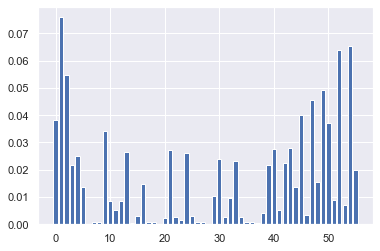

In [80]:
plt.bar(k,abs(importance))
plt.show()

In [81]:
feature_name

array(['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m',
       'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele',
       'nb_prod_act', 'net_margin', 'num_years_antig', 'pow_max',
       'mean_year_price_p1_var', 'mean_year_price_p2_var',
       'mean_year_price_p3_var', 'mean_year_price_p1_fix',
       'mean_year_price_p2_fix', 'mean_year_price_p3_fix',
       'mean_year_price_p1', 'mean_year_price_p2', 'mean_year_price_p3',
       'mean_6m_price_p1_var', 'mean_6m_price_p2_var',
       'mean_6m_price_p3_var', 'mean_6m_price_p1_fix',
       'mean_6m_price_p2_fix', 'mean_6m_price_p3_fix', 'mean_6m_price_p1',
       'mean_6m_price_p2', 'mean_6m_price_p3', 'mean_3m_price_p1_var',
       'mean_3m_price_p2_var', 'mean_3m_price_p3_var',
       'mean_3m_price_p1_fix', 'mean_3m_

The feature selection shows that most influential features are 'cons_gas_12m' and other origin variables and not directly the price variables which are rather scattered.

In [67]:
a=confusion_matrix(y_test,pred_outcome)
a

array([[3265,   14],
       [ 370,    3]], dtype=int64)

In [68]:
#Thus, the confusion matrix also shows around 89% accuracy

In [69]:
proba_predictions = model.predict_proba(x_test)
probabilities = proba_predictions[:, 1]

In [70]:
x_test = x_test.reset_index()
x_test.drop(columns='index', inplace=True)

In [71]:
x_test['churn'] = pred_outcome.tolist()
x_test['churn_probability'] = probabilities.tolist()

In [72]:
x_test.to_csv('out_of_sample_data_with_predictions1.csv')